TP fais par : Leo Pellandini, André Quintas Gervasio et Steven Jaquet

# Exercise 2 - Optional - Classification on MNIST

Using the SciKit Learn toolkit, train a multi-class logistic regression on the MNIST problem and compare the performances with the KNN of PW2.

For the “daring” ones, implement a multi-class version based on your own implementation and run it against MNIST data.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [9]:
train = pd.read_csv('mnist_train.csv')
X_train = train.drop('label', axis=1).values.reshape(-1,28,28)
y_train = train['label'].values

test = pd.read_csv('mnist_test.csv')
X_test = test.drop('label', axis=1).values.reshape(-1,28,28)
y_test = test['label'].values

In [10]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


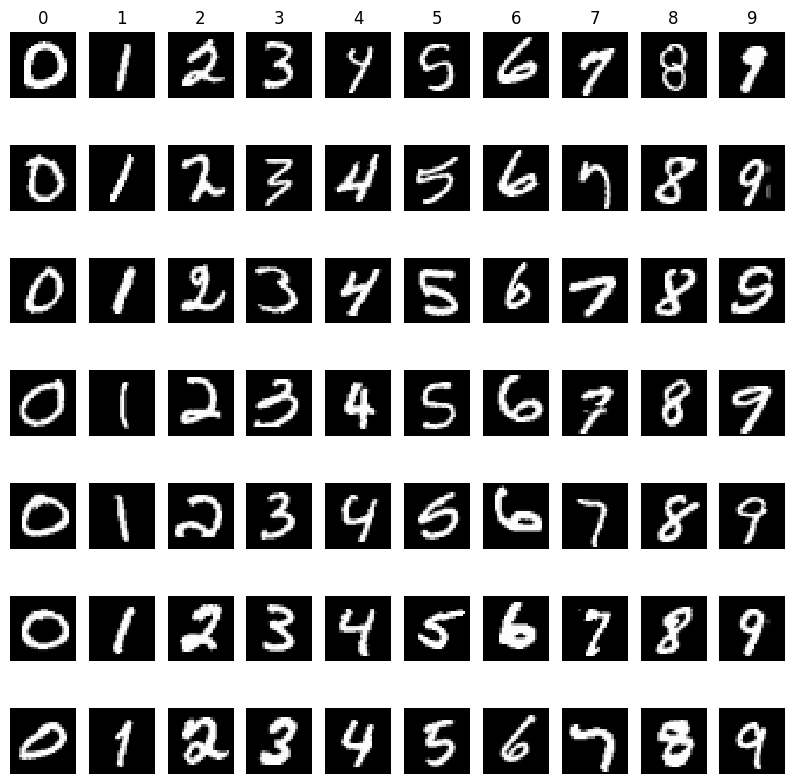

In [11]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes): # y and cls takes values from 0-9
    idxs = np.flatnonzero(y_train == y) # gets the indices of samples that corresponds to class y
    idxs = np.random.choice(idxs, samples_per_class, replace=False) # picks randomly samples_per_class indices
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1   # determines the sub-plot index
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [12]:
# TODO: train and test this data using logistic regression, you can use scikit-learn.
# You can subsample the data for training, because the set is large.
# You may need to put the data back to 1D.

# import necessaire
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [13]:
# normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 28 * 28))
X_test = scaler.transform(X_test.reshape(-1, 28 * 28))

# plus petit échantillon pour aller plus vite
X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]

# modèle regression logistique
log_reg = LogisticRegression(max_iter=1000)

# trainning
log_reg.fit(X_train_sample, y_train_sample)

# prediction 
y_pred = log_reg.predict(X_test)

# accuracy et f1 score
acc = accuracy_score(y_test, y_pred)
print("Accuracy :", acc)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score :", f1)

Accuracy : 0.8905
F1 Score : 0.8902259857531201


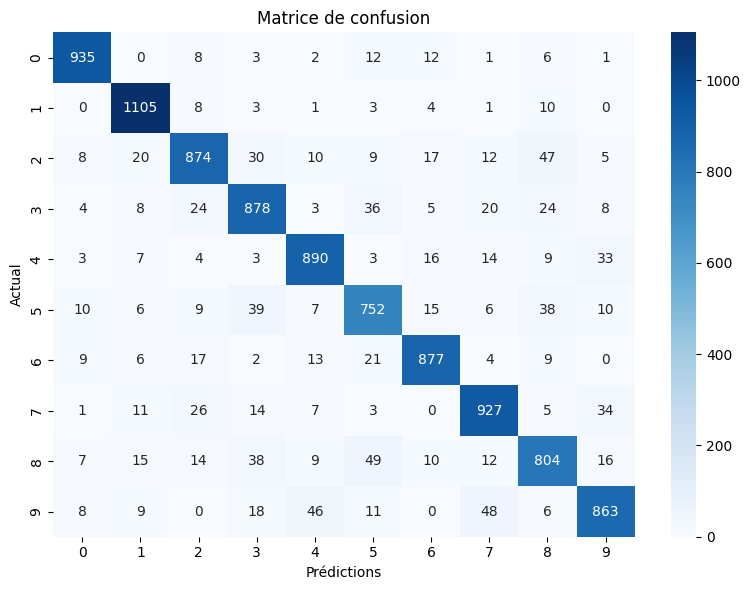

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

Résultat de comparaison par rapport au PW02 : 

    KNN     : Accuracy: 0.906000
    LogReg  : Accuracy : 0.8905

KNN est légèrement plus performant en précision brute sur ce dataset, mais Logistic Regression est plus efficace en calcul donc plus adapté à beaucoup de cas de production par exemple car moins couteux.